In [22]:
from google.colab import drive
drive.mount('/content/drive') #untuk menghungungkan googlecollab dengan dataset yang ada di drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd #printah untuk mengambil library pandas

# Tentukan path ke file CSV atau dataset lainnya di Google Drive Anda
file_path = "/content/drive/MyDrive/dataset/EconomiesOfScale.csv" #pemanggilan dataset yang berada pada drive

# Baca dataset menggunakan pandas
df = pd.read_csv(file_path) #membaca dataset

# Tampilkan beberapa baris pertama dari dataset
print(df.head()) #menampilkan dataset pada 5 baris awal


   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [5]:
df #menampilkan dataset 5 baris awal dan 5 baris akhir

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [6]:
df.head(7) #menampilkan 7 dataset awal

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756


In [7]:
df.info() #menampilkan info yang ada pada setiap dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [8]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [9]:
import seaborn as sns #memanggil library seaborn
import matplotlib.pyplot as plt #memanggil library matplotlib

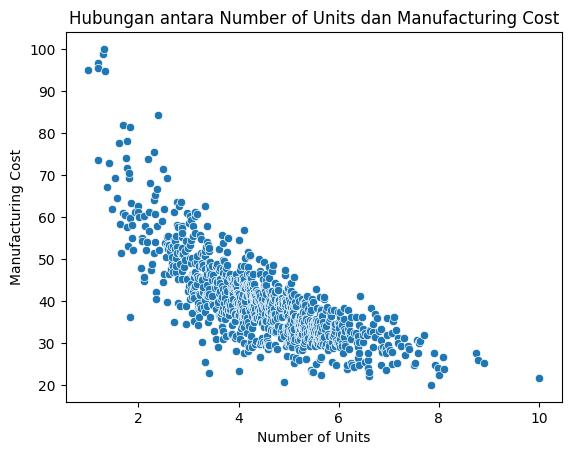

In [10]:
# Membuat scatter plot
sns.scatterplot(data=df, x="Number of Units", y="Manufacturing Cost") #mamasukan dataset yang sudah ada dimasukkan sebelumnya

# Memberikan judul dan label sumbu
plt.title("Hubungan antara Number of Units dan Manufacturing Cost") #perintah untuk menampilkan judul pada diagram
plt.xlabel("Number of Units") #memberi label pada sumbu x
plt.ylabel("Manufacturing Cost") #memberi label pada sumbu y

# Menampilkan plot
plt.show()

In [14]:
# Kolom label (variabel dependen)
x = df["Number of Units"]

# Kolom target (variabel independen)
y = df["Manufacturing Cost"]

In [21]:
x = np.array(x).reshape(-1, 1)
y = np.array(y)

In [15]:
import numpy as np #memanggil library numpy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Derajat 1: MSE = 47.22
Derajat 2: MSE = 37.57
Derajat 3: MSE = 35.07
Derajat 4: MSE = 34.41
Derajat 5: MSE = 34.08
Derajat 6: MSE = 33.89
Derajat 7: MSE = 33.78
Derajat 8: MSE = 33.70
Derajat 9: MSE = 33.61
Derajat 10: MSE = 33.41
Derajat 11: MSE = 33.13
Derajat 12: MSE = 33.04


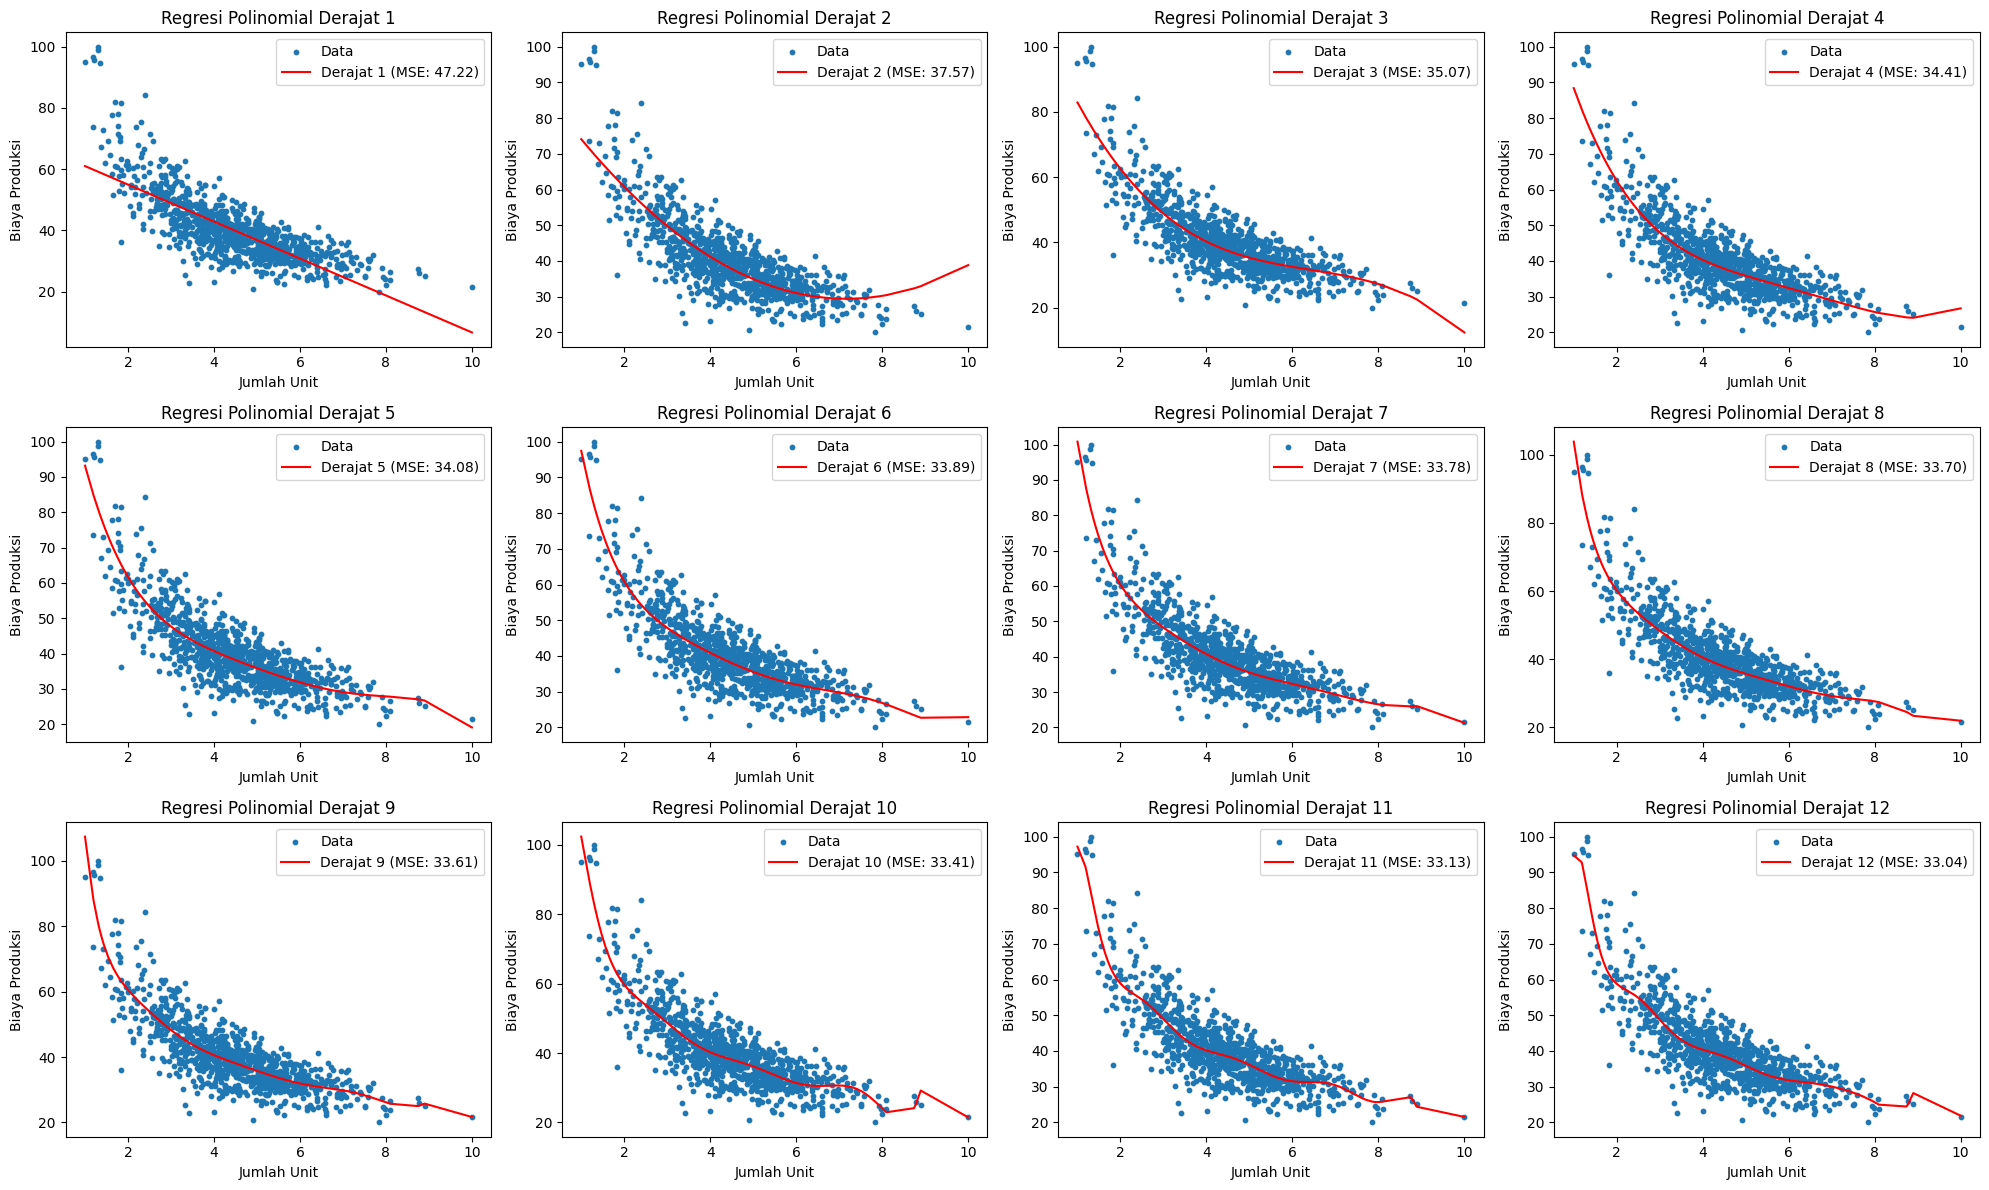

In [24]:
# Import library yang diperlukan
degrees = list(range(1, 13))  # Membuat daftar derajat polinomial dari 1 hingga 12
mse_values = []  # Membuat daftar untuk menyimpan nilai Mean Squared Error (MSE)
plt.figure(figsize=(20, 12))  # Mengatur ukuran gambar

# Looping melalui setiap derajat polinomial
for i, degree in enumerate(degrees):
    # Membuat fitur polinomial sesuai dengan derajat yang sedang diproses
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    # Membuat model regresi linear
    model = LinearRegression()
    model.fit(x_poly, y)

    # Melakukan prediksi menggunakan model yang telah dilatih
    y_pred = model.predict(x_poly)

    # Menghitung Mean Squared Error (MSE) antara prediksi dan data aktual
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot data asli dan hasil regresi polinomial
    plt.subplot(3, 4, i + 1)  # Membagi gambar menjadi 3 baris dan 4 kolom, memilih subplot ke-i+1
    plt.scatter(x, y, s=10, label='Data')  # Plot data asli
    plt.plot(x, y_pred, color='r', label=f'Derajat {degree} (MSE: {mse:.2f})')  # Plot hasil regresi polinomial
    plt.title(f'Regresi Polinomial Derajat {degree}')
    plt.xlabel('Jumlah Unit')  # Label sumbu x
    plt.ylabel('Biaya Produksi')  # Label sumbu y
    plt.legend()  # Menampilkan legenda

# Mencetak MSE untuk setiap derajat polinomial
for degree, mse in zip(degrees, mse_values):
    print(f'Derajat {degree}: MSE = {mse:.2f}')

plt.tight_layout()  # Menyusun subplot agar tidak tumpang tindih
plt.show()  # Menampilkan gambar
